In [42]:
ls -al data


total 14648
drwxr-xr-x  12 joshuamelchor  staff      384 May  9 20:09 ./
drwxr-xr-x@  6 joshuamelchor  staff      192 May  9 20:18 ../
-rw-r--r--@  1 joshuamelchor  staff     6148 May  9 20:09 .DS_Store
-rw-r--r--@  1 joshuamelchor  staff  3929143 May  9 18:36 1950-2018-torn-aspath.zip
-rw-r--r--   1 joshuamelchor  staff  3191635 May  9 18:36 1950-2018-torn-initpoint.zip
-rw-r--r--   1 joshuamelchor  staff        5 May  9 18:36 usa-states-census-2014.cpg
-rw-r--r--   1 joshuamelchor  staff    15201 May  9 18:36 usa-states-census-2014.dbf
-rw-r--r--   1 joshuamelchor  staff      143 May  9 18:36 usa-states-census-2014.prj
-rw-r--r--   1 joshuamelchor  staff      257 May  9 18:36 usa-states-census-2014.qpj
-rw-r--r--   1 joshuamelchor  staff   309672 May  9 18:36 usa-states-census-2014.shp
-rw-r--r--   1 joshuamelchor  staff    18517 May  9 18:36 usa-states-census-2014.shp.xml
-rw-r--r--   1 joshuamelchor  staff      564 May  9 18:36 usa-states-census-2014.shx


In [43]:
import matplotlib.pyplot as plt
import geopandas

states = geopandas.read_file('data/usa-states-census-2014.shp')

states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,region,geometry
0,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,West,"MULTIPOLYGON Z (((-118.59397 33.4672 0, -118.4..."
1,11,01702382,0400000US11,11,DC,District of Columbia,00,158350578,18633500,Northeast,"POLYGON Z ((-77.11976 38.93434 0, -77.04102 38..."
2,12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551,Southeast,"MULTIPOLYGON Z (((-81.81169 24.56874 0, -81.75..."
3,13,01705317,0400000US13,13,GA,Georgia,00,148963503399,4947080103,Southeast,"POLYGON Z ((-85.60516 34.98468 0, -85.47434 34..."
4,16,01779783,0400000US16,16,ID,Idaho,00,214045425549,2397728105,West,"POLYGON Z ((-117.24303 44.39097 0, -117.21507 ..."


In [44]:
states.crs #Coordinate Reference System

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Text(-0.05, 0.5, 'Map')

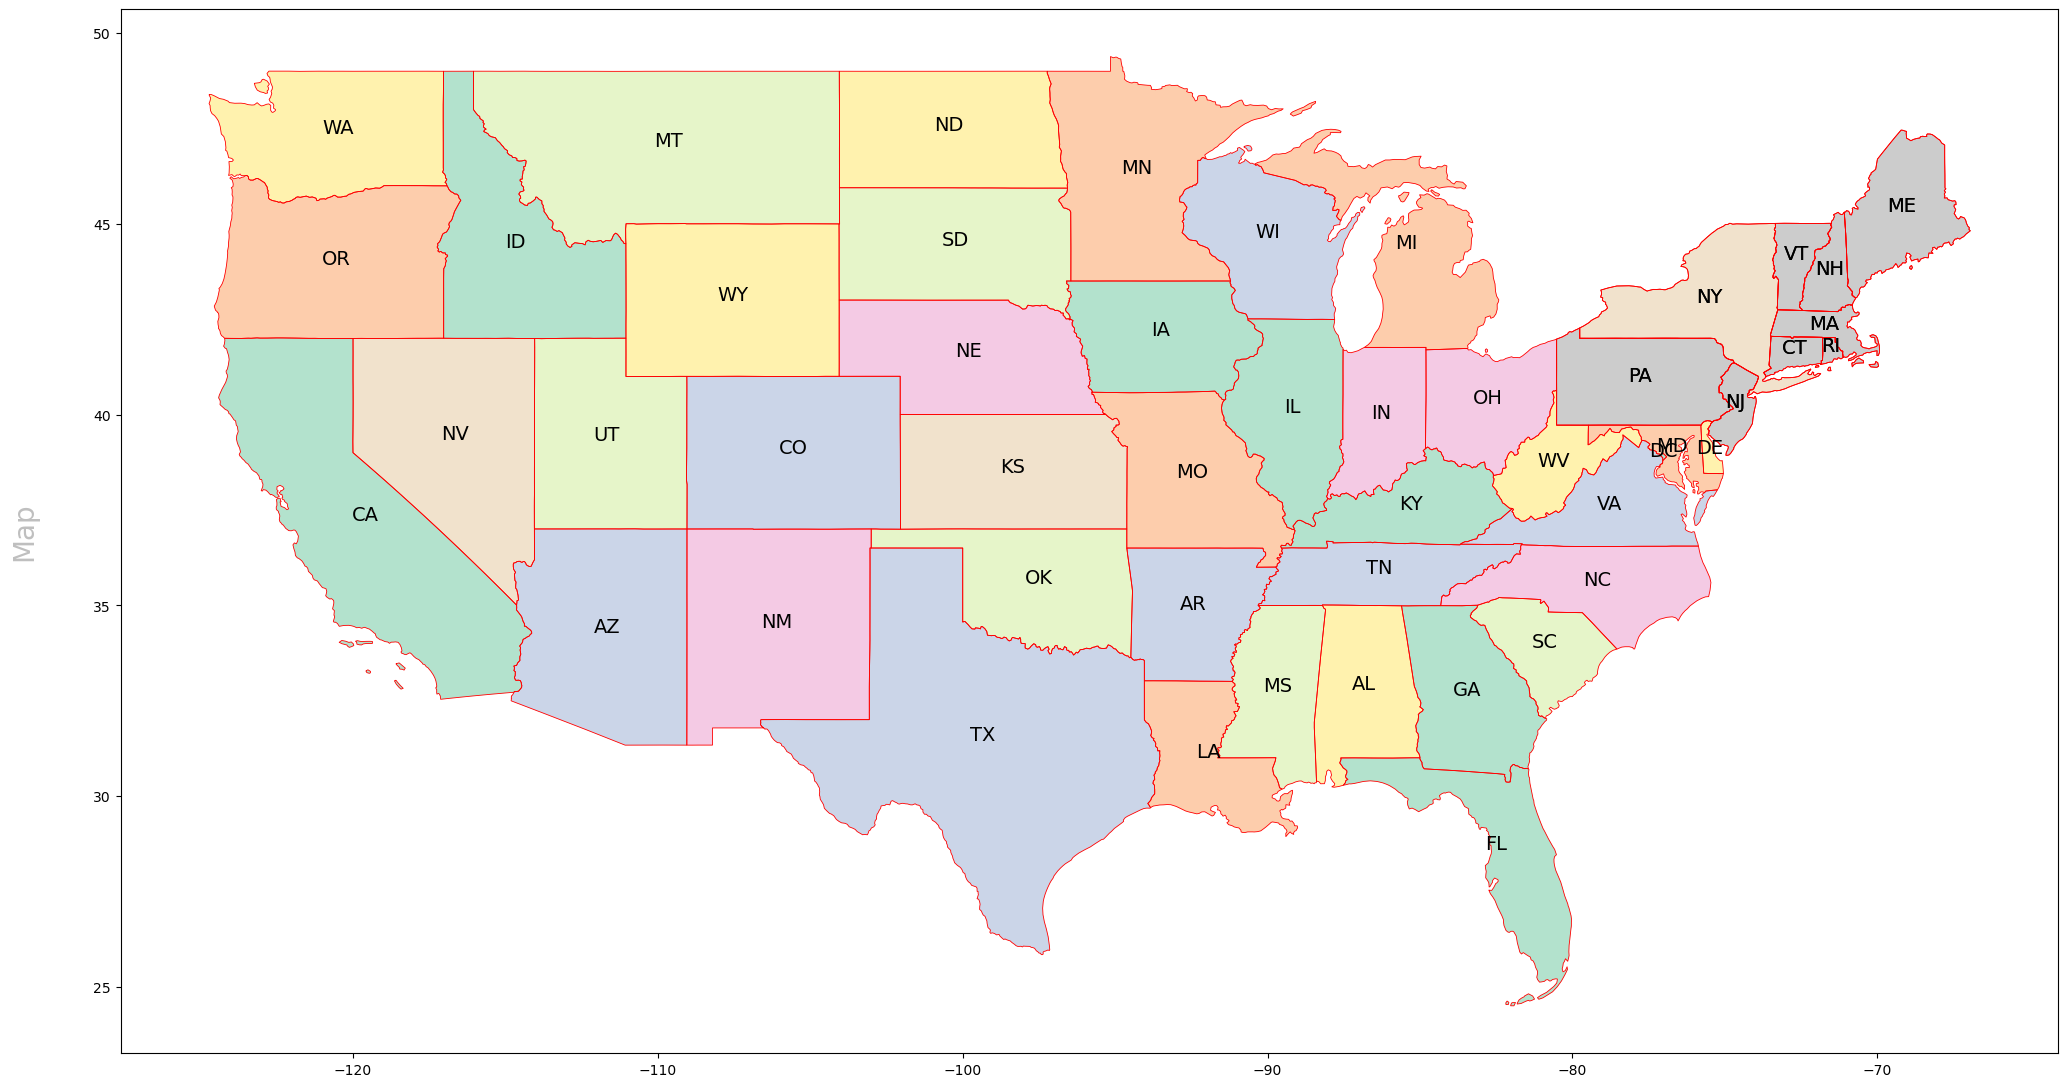

In [74]:

fig = plt.figure(1, figsize=(25,25)) 
ax = fig.add_subplot()

states.apply(lambda x: ax.annotate(x.STUSPS, xy=x.geometry.centroid.coords[0], ha='center', fontsize=14), axis=1)

states.boundary.plot(ax=ax, color='Red', linewidth=.6)

states.plot(ax=ax, cmap='Pastel2', figsize=(12, 12))

ax.text(-0.05, 0.5, 'Map', transform=ax.transAxes,
        fontsize=20, color='gray', alpha=0.5,
        ha='center', va='center', rotation=90)


In [81]:
#2020 dataset
states2020 = geopandas.read_file('cb_2020_us_cousub_500k/cb_2020_us_cousub_500k.shp')

states2020.head()

,STATEFP,COUNTYFP,COUSUBFP,COUSUBNS,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,NAMELSADCO,STATE_NAME,LSAD,ALAND,AWATER,geometry
0,29,195,22096,00767361,0600000US2919522096,2919522096,Elmwood,Elmwood township,MO,Saline County,Missouri,44,181233131,377337,"POLYGON ((-93.48978 39.06658, -93.48938 39.073..."
1,38,099,45260,01036531,0600000US3809945260,3809945260,Latona,Latona township,ND,Walsh County,North Dakota,44,90848624,2941846,"POLYGON ((-98.16255 48.36954, -98.05746 48.369..."
2,38,017,16100,01036391,0600000US3801716100,3801716100,Cornell,Cornell township,ND,Cass County,North Dakota,44,93440087,0,"POLYGON ((-97.70538 47.04981, -97.70558 47.051..."
3,38,093,22940,01036472,0600000US3809322940,3809322940,Eldridge,Eldridge township,ND,Stutsman County,North Dakota,44,90001176,2572532,"POLYGON ((-98.94567 46.97918, -98.85914 46.979..."
4,38,079,67780,01036243,0600000US3807967780,3807967780,Rolette,Rolette city,ND,Rolette County,North Dakota,25,2609731,0,"POLYGON ((-99.85266 48.6682, -99.83068 48.6681..."


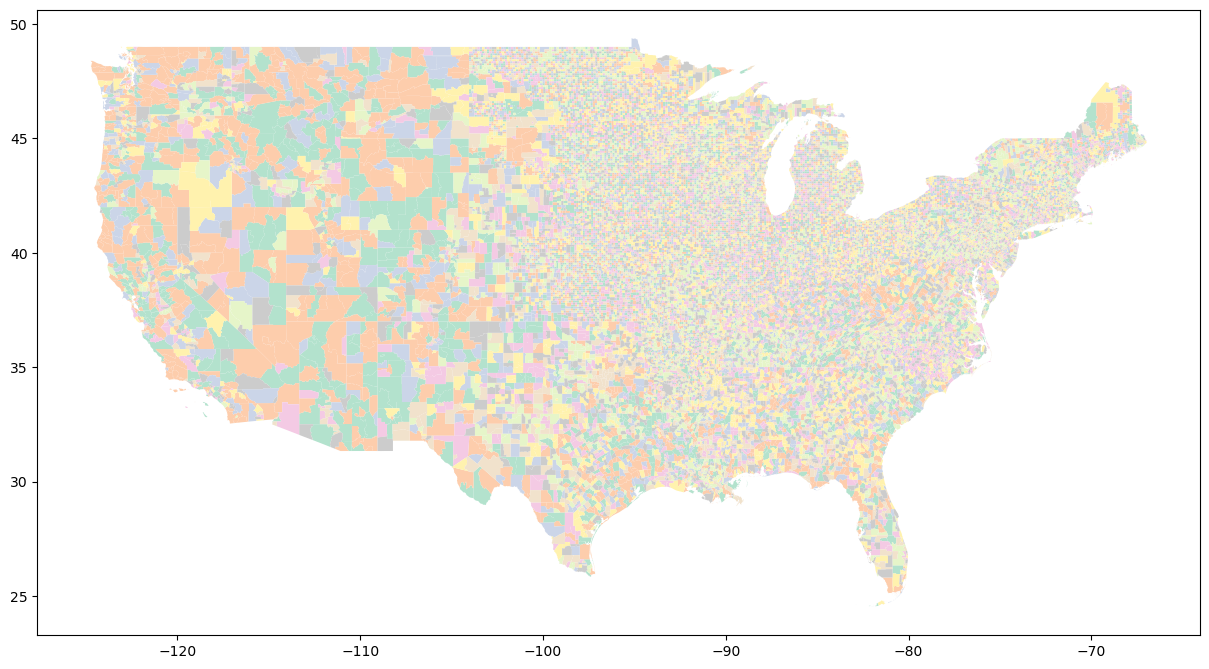

In [ ]:
# Filter out Alaska, Hawaii, and US territories
exclude = [
    'Alaska', 'Hawaii', 'Puerto Rico', 'Guam',
    'American Samoa', 'Commonwealth of the Northern Mariana Islands', 'United States Virgin Islands'
]
continental_states = states2020[~states2020['STATE_NAME'].isin(exclude)]

# Plot only the continental US
fig, ax = plt.subplots(figsize=(15, 10))
continental_states.plot(ax=ax, cmap='Pastel2')

plt.show()